In [1]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Pokemon():
    def __init__(self):
        self.conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = self.conexao.cursor()
        self.pokemons= self.cursor.execute('SELECT count(id) FROM pokemon;').fetchone()[0]
    def fortes(self):
        df = pd.read_sql('SELECT Total,Name FROM pokemon;',self.conexao)
        df=df.nlargest(5, 'Total')
        return df
pokemon=Pokemon()

['Arceus', 'KyuremBlack', 'KyuremWhite', 'Mewtwo', 'Lugia']


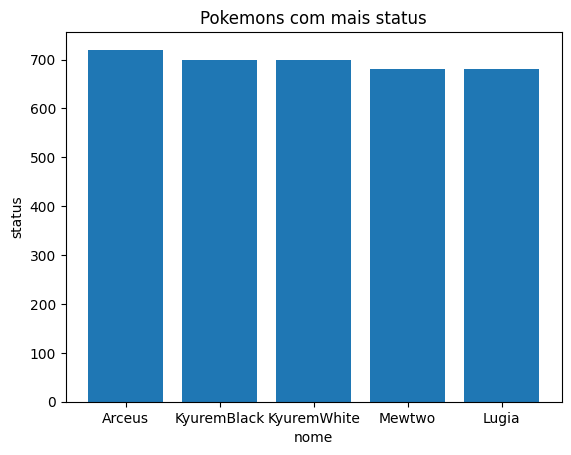

In [3]:
df=pokemon.fortes()
totais=[]
nomes=[]

for Total in df['Total']:
    totais.append(Total)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)

print(nomes)
# Criar gráfico de barras
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons com mais status')
plt.xlabel('nome')
plt.ylabel('status')

# Mostrar o gráfico
plt.show()